In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# checking different columns and their value counts
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

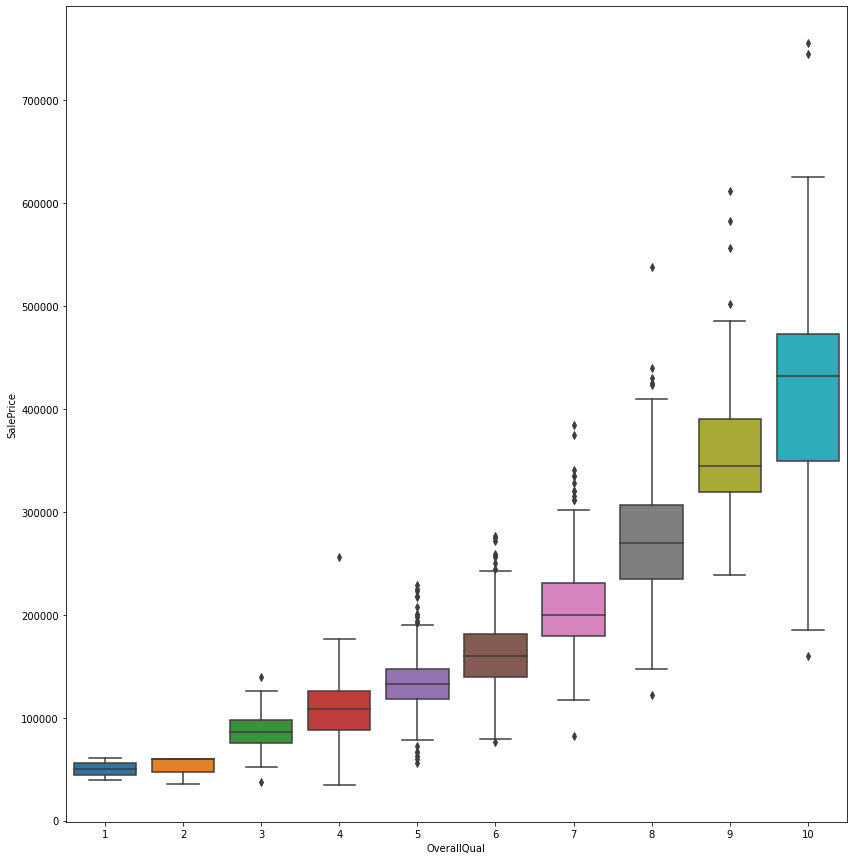

In [6]:
# checking how each lable is connected to Required Label or target label
fig = plt.figure(figsize = (14,15))
sb.boxplot(x = 'OverallQual',y='SalePrice',data=df)

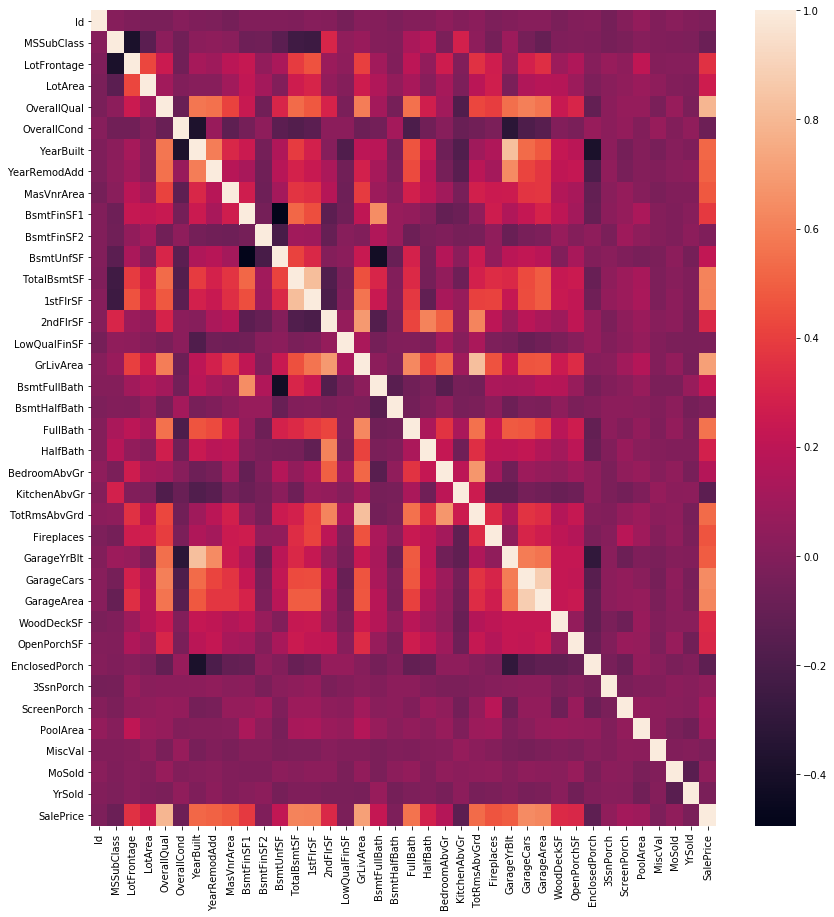

In [7]:
# creating a heatmap which shows correlation between variable
# eg: hwo garagecars and garagearea are highly corelated and hence one can be dropped
fig = plt.figure(figsize = (14,15))
sb.heatmap(df.corr())

In [8]:
# from columns defition replacing the nan values which are actually 0
col = ['GarageCond','GarageQual','FireplaceQu','BsmtFinType1','BsmtFinType2','BsmtExposure'
       ,'BsmtCond','BsmtQual','GarageFinish','PoolQC','MasVnrType']
for co in col:
    df[col] = df[col].fillna(0)

In [9]:
# dropping columns which are either useless like id or have most values as same and hence dont impact the set much
# also dropping redundacnt columns
df_clean = df.drop(['Id','MSZoning','Street','Alley','LandContour','Utilities','LandSlope','BldgType'
                    ,'YearBuilt','RoofStyle','RoofMatl','TotalBsmtSF','Heating','CentralAir','Electrical'
                    ,'GrLivArea','TotRmsAbvGrd','Functional','GarageType','GarageYrBlt','GarageCars','MoSold'
                    ,'YrSold','SaleType','MiscFeature','Fence','SaleCondition'],axis=1)

In [10]:
# creating and adding dummies columns since two covering will increase price and can be shown in same column
test1 = pd.get_dummies(df_clean['Exterior1st'])
test2 = pd.get_dummies(df_clean['Exterior2nd'])

In [11]:
# renaming values which mean same but have different name but are same
test2 = test2.rename(columns={'Brk Cmn':'BrkComm','CmentBd':'CemntBd','Wd Shng':'WdShing'})

In [12]:
test = pd.DataFrame()
for a in test1.columns:
    test[a] = test1[a] + test2[a]

In [13]:
# adding the column which was not in both but only in one
ext_enc=test.join(test2['Other'])

In [14]:
ext_enc

,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Other
0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1456,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1457,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [15]:
test1 = pd.get_dummies(df_clean['Condition1'])
test2 = pd.get_dummies(df_clean['Condition2'])

In [16]:
test = pd.DataFrame()
for a in test2.columns:
    test[a] = test1[a] + test2[a]

In [17]:
test1.columns,test2.columns

(Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'],
       dtype='object'),
 Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], dtype='object'))

In [18]:
cond_enc=test.join(test1['RRNe'])

In [19]:
cond_enc

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,RRNe
0,0,0,2,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,0,0,2,0,0,0,0,0,0
1456,0,0,2,0,0,0,0,0,0
1457,0,0,2,0,0,0,0,0,0
1458,0,0,2,0,0,0,0,0,0


In [20]:
mvt_enc=pd.get_dummies(df_clean['MasVnrType'],prefix='MasVnrType')

In [21]:
mvt_enc

,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,0,1
1457,0,0,0,1,0
1458,0,0,0,1,0


In [22]:
fnd_enc=pd.get_dummies(df_clean['Foundation'],prefix='foundation')

In [23]:
fnd_enc

,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1455,0,0,1,0,0,0
1456,0,1,0,0,0,0
1457,0,0,0,0,1,0
1458,0,1,0,0,0,0


In [24]:
# creating a dict to replace column values with numbers representing their importance like 
# none = 0,poor = 1,fair= 2,average = 3,good = 4,excellent = 5
cleanup = {
            'ExterQual':{'TA':2,'Gd':3,'Ex':4,'Fa':1,'Po':0},
            'ExterCond':{'TA':2,'Gd':3,'Ex':4,'Fa':1,'Po':0},
            'BsmtQual':{'TA':2,'Gd':3,'Ex':4,'Fa':1},
            'FireplaceQu':{'TA':3,'Gd':4,'Ex':5,'Fa':2,'Po':1},
            'PoolQC':{'TA':3,'Gd':4,'Ex':5,'Fa':2,'Po':1},
            'KitchenQual':{'TA':2,'Gd':3,'Ex':4,'Fa':1},
            'BsmtCond':{'TA':3,'Gd':4,'Ex':5,'Fa':2,'Po':1},
            'PavedDrive':{'Y':2,'N':0,'P':1},
            'BsmtExposure':{'No':0,'Av':2,'Gd':3,'Mn':1},
            'BsmtFinType1':{'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2},
            'BsmtFinType2':{'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2},
            'HeatingQC':{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
            'CentralAir':{'Y':1,'N':0},
            'GarageQual':{'TA':2,'Gd':3,'Ex':4,'Fa':1,'Po':0},
            'GarageCond':{'TA':2,'Gd':3,'Ex':4,'Fa':1,'Po':0},
            'GarageFinish':{'RFn':2, 'Unf':1, 'Fin':3}
          }

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   Condition1     1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [26]:
# replacing all the values in the columns mentioned in the dictionary
df_clean_1 = df_clean.replace(cleanup)

In [27]:
df_clean_1

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice
0,60,65.0,8450,Reg,Inside,CollgCr,Norm,Norm,2Story,7,...,2,0,61,0,0,0,0,0,0,208500
1,20,80.0,9600,Reg,FR2,Veenker,Feedr,Norm,1Story,6,...,2,298,0,0,0,0,0,0,0,181500
2,60,68.0,11250,IR1,Inside,CollgCr,Norm,Norm,2Story,7,...,2,0,42,0,0,0,0,0,0,223500
3,70,60.0,9550,IR1,Corner,Crawfor,Norm,Norm,2Story,7,...,2,0,35,272,0,0,0,0,0,140000
4,60,84.0,14260,IR1,FR2,NoRidge,Norm,Norm,2Story,8,...,2,192,84,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Reg,Inside,Gilbert,Norm,Norm,2Story,6,...,2,0,40,0,0,0,0,0,0,175000
1456,20,85.0,13175,Reg,Inside,NWAmes,Norm,Norm,1Story,6,...,2,349,0,0,0,0,0,0,0,210000
1457,70,66.0,9042,Reg,Inside,Crawfor,Norm,Norm,2Story,7,...,2,0,60,0,0,0,0,0,2500,266500
1458,20,68.0,9717,Reg,Inside,NAmes,Norm,Norm,1Story,5,...,2,366,0,112,0,0,0,0,0,142125


In [28]:
df_clean_1=df_clean_1.drop(['Condition1','Condition2','Exterior1st','Exterior2nd','Foundation','MasVnrType'],axis=1)

In [29]:
# dropping and replacing categorical columns with encoded columns
df_clean_1=df_clean_1.join(ext_enc)
df_clean_1=df_clean_1.join(mvt_enc)
df_clean_1=df_clean_1.join(cond_enc)
df_clean_1=df_clean_1.join(fnd_enc)

In [30]:
df_clean_1

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,...,RRAe,RRAn,RRNn,RRNe,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
0,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,...,0,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,...,0,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,...,0,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,2000,...,0,0,0,0,0,0,1,0,0,0
1456,20,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,1988,...,0,0,0,0,0,1,0,0,0,0
1457,70,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,2006,...,0,0,0,0,0,0,0,0,1,0
1458,20,68.0,9717,Reg,Inside,NAmes,1Story,5,6,1996,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1201 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   LotShape            1460 non-null   object 
 4   LotConfig           1460 non-null   object 
 5   Neighborhood        1460 non-null   object 
 6   HouseStyle          1460 non-null   object 
 7   OverallQual         1460 non-null   int64  
 8   OverallCond         1460 non-null   int64  
 9   YearRemodAdd        1460 non-null   int64  
 10  MasVnrArea          1452 non-null   float64
 11  ExterQual           1460 non-null   int64  
 12  ExterCond           1460 non-null   int64  
 13  BsmtQual            1460 non-null   int64  
 14  BsmtCond            1460 non-null   int64  
 15  BsmtExposure        1460 non-null   int64  
 16  BsmtFi

In [32]:
# filling null values with mean values in appropiate columns
df_clean_1['LotFrontage']=df_clean_1['LotFrontage'].fillna(df['LotFrontage'].mean())

In [33]:
# dropping duplicates and rows wiht null entries which cannot be replaced
df_clean_1 = df_clean_1.drop_duplicates()
df_clean_1.dropna(inplace=True)
df_clean_1.reset_index(drop=True,inplace=True)

In [34]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1452 non-null   int64  
 1   LotFrontage         1452 non-null   float64
 2   LotArea             1452 non-null   int64  
 3   LotShape            1452 non-null   object 
 4   LotConfig           1452 non-null   object 
 5   Neighborhood        1452 non-null   object 
 6   HouseStyle          1452 non-null   object 
 7   OverallQual         1452 non-null   int64  
 8   OverallCond         1452 non-null   int64  
 9   YearRemodAdd        1452 non-null   int64  
 10  MasVnrArea          1452 non-null   float64
 11  ExterQual           1452 non-null   int64  
 12  ExterCond           1452 non-null   int64  
 13  BsmtQual            1452 non-null   int64  
 14  BsmtCond            1452 non-null   int64  
 15  BsmtExposure        1452 non-null   int64  
 16  BsmtFi

In [35]:
# final encoding for columns
df_final = pd.get_dummies(df_clean_1,columns = ['LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle'],drop_first=True)

In [36]:
df_final.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,70.033636,10507.276171,6.092975,5.579201,1984.775482,103.685262,2.391873,2.084022,2.511708,...,0.017218,0.026171,0.007576,0.009642,0.496556,0.005510,0.007576,0.304408,0.025482,0.044766
std,42.340097,22.033478,9989.563592,1.381289,1.113136,20.652466,181.066207,0.572771,0.351965,0.785289,...,0.130126,0.159698,0.086738,0.097752,0.500160,0.074048,0.086738,0.460315,0.157638,0.206861
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7538.750000,5.000000,5.000000,1966.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1993.000000,0.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2004.000000,166.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# creating independant variable array = X and dependant variable array = y
X=df_final.drop('SalePrice',axis=1).values
y=df_final['SalePrice'].values

In [38]:
X.shape,y.shape

((1452, 117), (1452,))

In [39]:
# scaling the X array so it doesnt depend too much on variable which have high values like surface area over
# any neighbourhood which is binary
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
# Adding models to try out on dataset
models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('Ridge',Ridge(alpha = 1.5)))
models.append(('E-Net',ElasticNet(alpha = 0.75)))
models.append(('Lasso',Lasso(alpha = 2)))

In [41]:
# implementinjg those models and saving their r_2 score
import warnings
warnings.filterwarnings('ignore')
score = {}
for name,model in models:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
    score[name] = scores.mean()

In [42]:
for i,j in score.items():
    print(i,j)

Linear Regression -6.039029854117735e+24
Ridge 0.8067516492186335
E-Net 0.8203377224095642
Lasso 0.80628791663266


In [43]:
# sorting the models by their scores
score_sorted = sorted([(x,y) for y,x in score.items()],reverse = True)

In [44]:
print( score_sorted[0][1],'Regression has the highest score and hence will be selected with score of',score_sorted[0][0])

E-Net Regression has the highest score and hence will be selected with score of 0.8203377224095642


In [45]:
# linear regression outputs negative score because there is no direct relation between
# labels due to vast number of factors that affect the cost of the house for example
# the area if house might be huge but it might be a bad quality overall and will be sold for less than a
# much smaller house which is in excellent condition and well built
# similarily a house which is excellent but small might be sold for a larger house which has pool or better basement